In [1]:
import sys
sys.path.append('/home/ardelalegre/SoundMapping/Analysis/Util')
sys.path.append('/home/ardelalegre/SoundMapping/Database')
from DatabaseAPI import DatabaseAPI
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from get_time_interval_data import *
from PCA import *
from Plot import *
import pickle
from sklearn.cluster import KMeans

In [2]:
chair2_03 = get_time_interval_matrix_data("Nov 3 2020 04:00PM", "Nov 3 2020 04:04PM")
chair3_03 = get_time_interval_matrix_data("Nov 3 2020 04:05PM", "Nov 3 2020 04:09PM")
chair4_03 = get_time_interval_matrix_data("Nov 3 2020 04:10PM", "Nov 3 2020 04:14PM")
chair5_03 = get_time_interval_matrix_data("Nov 3 2020 04:15PM", "Nov 3 2020 04:19PM")
chair1_03 = get_time_interval_matrix_data("Nov 3 2020 04:20PM", "Nov 3 2020 04:24PM")
static_point_data_03 = np.vstack([chair2_03, chair3_03, chair4_03, chair5_03, chair1_03])
static_point_cdata_03 = get_cdata(static_point_data_03)
projections_03 = project_to_eigen_vectors(static_point_cdata_03, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

/home/ardelalegre/SoundMapping/Analysis/Util/PCA.py:43: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data[:,1:],axis = 0,keepdims = True)


In [2]:
chair2_20 = get_time_interval_matrix_data('Nov 20 2020 03:50PM', 'Nov 20 2020 03:54PM')
chair3_20 = get_time_interval_matrix_data('Nov 20 2020 03:55PM', 'Nov 20 2020 03:59PM')
chair4_20 = get_time_interval_matrix_data('Nov 20 2020 04:00PM', 'Nov 20 2020 04:04PM')
chair5_20 = get_time_interval_matrix_data('Nov 20 2020 04:05PM', 'Nov 20 2020 04:09PM')
chair1_20 = get_time_interval_matrix_data('Nov 20 2020 04:15PM', 'Nov 20 2020 04:19PM')
static_point_data_20 = np.vstack([chair2_20, chair3_20, chair4_20, chair5_20, chair1_20])
static_point_cdata_20 = get_cdata(static_point_data_20)
projections_20 = project_to_eigen_vectors(static_point_cdata_20, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

/home/ardelalegre/SoundMapping/Analysis/Util/PCA.py:43: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data[:,1:],axis = 0,keepdims = True)


In [5]:
static_point_data_merged = np.vstack([chair2_03, chair3_20, chair4_20, chair5_20, chair1_20])
static_point_cdata_merged = get_cdata(static_point_data_merged)
projections_merged = project_to_eigen_vectors(static_point_cdata_merged, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

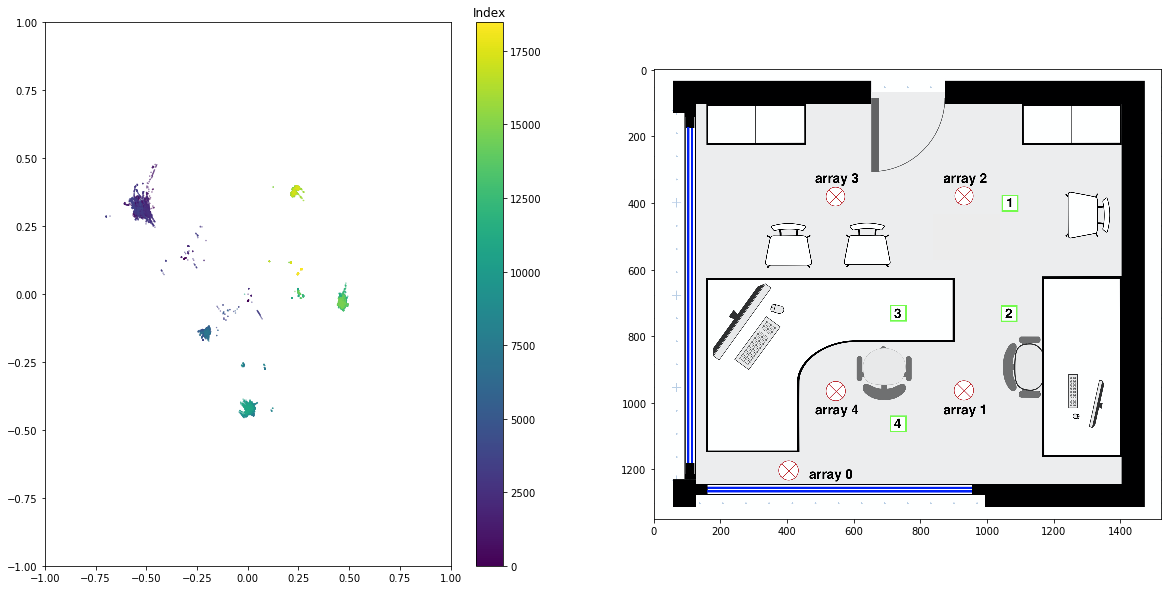

In [18]:
fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(121)
temp = ax.scatter(projections_merged[:,0], projections_merged[:,1], c = np.arange(projections_merged.shape[0]), s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

ax2 = fig.add_subplot(122)
room_model_chair = plt.imread('room_model_v4.png')
ax2.imshow(room_model_chair)

plt.show()

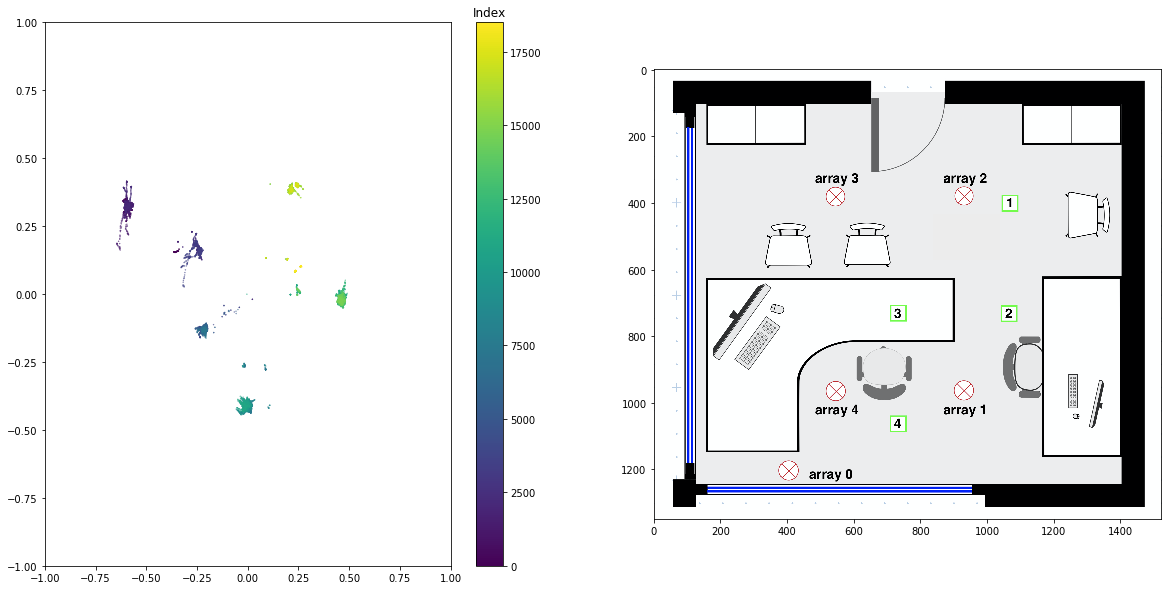

In [7]:
fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(121)
temp = ax.scatter(projections_20[:,0], projections_20[:,1], c = np.arange(projections_20.shape[0]), s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

ax2 = fig.add_subplot(122)
room_model_chair = plt.imread('room_model_v4.png')
ax2.imshow(room_model_chair)

plt.show()

### Data Investigation
After plotting channels of each array as time series, we found out that only array 1, 3, and 5 have continuous detection on Nov 20th. We will extract observations where all arrays were active and calculate some statistics.

chair2_20 <br>
chair3_20 <br>
chair4_20 <br>
chair5_20 <br>

(0,1,2)    array 0 <br>
(3,4,5)    array 1 <br>
(6,7,8)    array 2 <br>
(9,10,11)  array 3 <br>
(12,13,14) array 4 <br>
(15,16,17) array 5

In [3]:
def extract_all_active_observations(interval_matrix_data, array_indices):
    # exclude time column
    observations = interval_matrix_data[:,1:]
    selected_obs = np.hstack([observations[:,i*3:i*3+3] for i in array_indices])
    cleaned_data = []
    ind = []
    for i in range(selected_obs.shape[0]):
        if not any(np.isnan(selected_obs[i,:])):
            cleaned_data.append(selected_obs[i,:])
            ind.append(i)
    selected_raw_obs = interval_matrix_data[ind,:]        
    return  np.vstack(cleaned_data), selected_raw_obs

In [4]:
array_indices = [1,3,5]
chair2_20_cleaned, chair2 = extract_all_active_observations(chair2_20, array_indices)
chair3_20_cleaned, chair3 = extract_all_active_observations(chair3_20, array_indices)
chair4_20_cleaned, chair4 = extract_all_active_observations(chair4_20, array_indices)
chair5_20_cleaned, chair5 = extract_all_active_observations(chair5_20, array_indices)
static_point_4_chairs = np.vstack([chair2_20, chair3_20, chair4_20, chair5_20])
static_point_4_chairs_cleaned = np.vstack([chair2_20_cleaned, 
                                           chair3_20_cleaned, 
                                           chair4_20_cleaned, 
                                           chair5_20_cleaned])

### Statistics

In [5]:
# what is the percentage of the observations where all arrays were active
chair2_ratio = chair2_20_cleaned.shape[0]/chair2_20.shape[0]
chair3_ratio = chair3_20_cleaned.shape[0]/chair3_20.shape[0]
chair4_ratio = chair4_20_cleaned.shape[0]/chair4_20.shape[0]
chair5_ratio = chair5_20_cleaned.shape[0]/chair5_20.shape[0]
overall_ratio = static_point_4_chairs_cleaned.shape[0]/static_point_4_chairs.shape[0]

In [6]:
table = {'chair2': chair2_ratio, 
         'chair3': chair3_ratio, 
         'chair4': chair4_ratio, 
         'chair5': chair5_ratio, 
         'Overall': overall_ratio}

In [7]:
table

{'Overall': 0.8496250759981084,
 'chair2': 0.473585411638509,
 'chair3': 0.991008174386921,
 'chair4': 0.9765055360518499,
 'chair5': 0.9613617941097001}

### Projection using clean data only

In [16]:
selected_raw = np.vstack([chair2, chair3, chair4, chair5])

In [17]:
selected_raw[:,1:4] = np.NaN
selected_raw[:,7:10] = np.NaN

In [18]:
selected_cdata = get_cdata(selected_raw)

In [19]:
projections_selected = project_to_eigen_vectors(selected_cdata, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

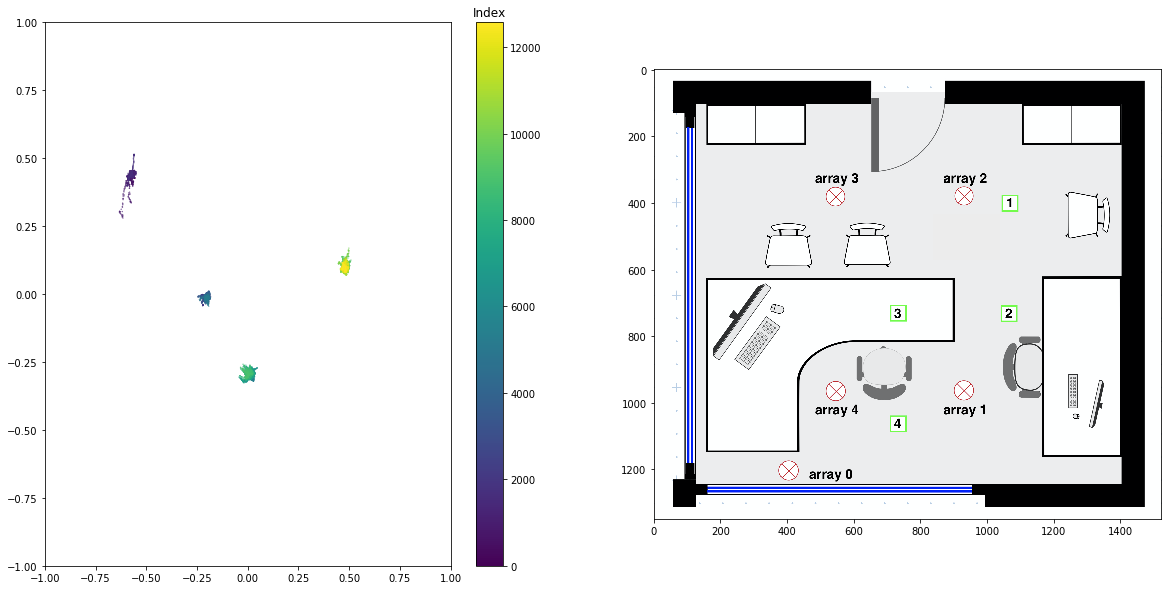

In [20]:
fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(121)
temp = ax.scatter(projections_selected[:,0], 
                  projections_selected[:,1], 
                  c = np.arange(projections_selected.shape[0]), 
                  s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

ax2 = fig.add_subplot(122)
room_model_chair = plt.imread('room_model_v4.png')
ax2.imshow(room_model_chair)

plt.show()